# PROJECT PRACTICES 1
Titanic_train

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [73]:
df = pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
df.shape

(891, 12)

In [76]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [80]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


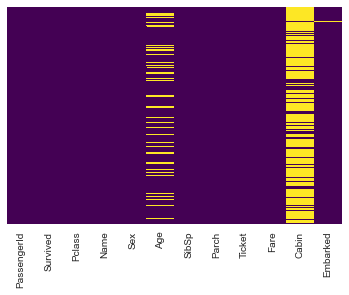

In [81]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

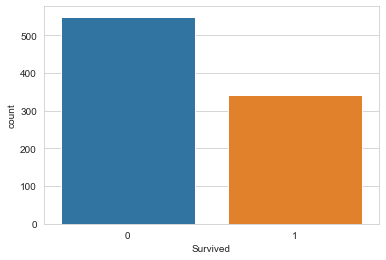

In [82]:
sns.set_style('whitegrid')
sns.countplot(df['Survived'],label="Count")

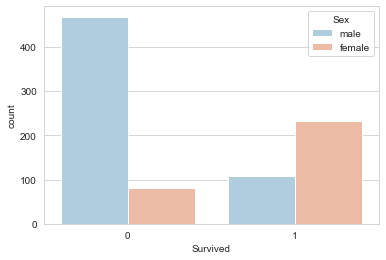

In [83]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

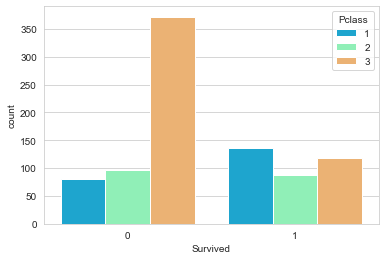

In [84]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

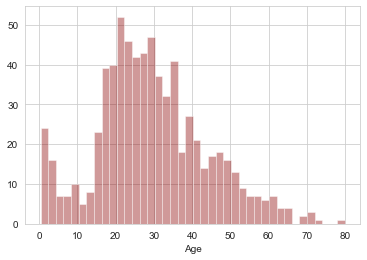

In [85]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

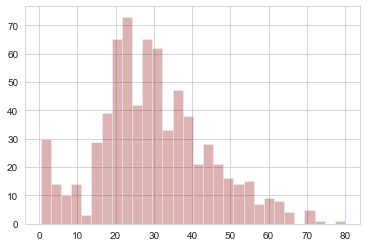

In [86]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

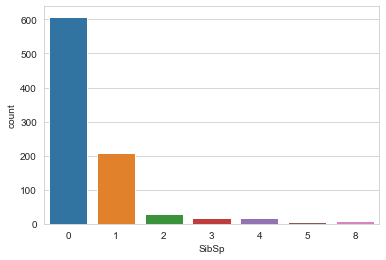

In [87]:
sns.countplot(x='SibSp',data=df)

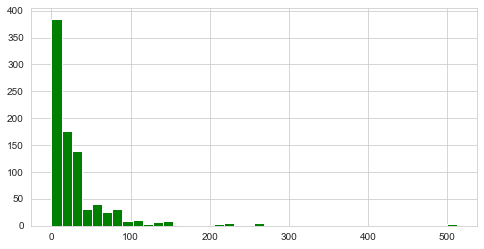

In [88]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

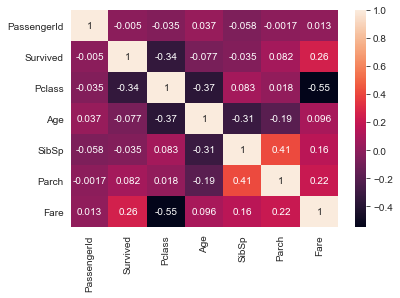

In [89]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

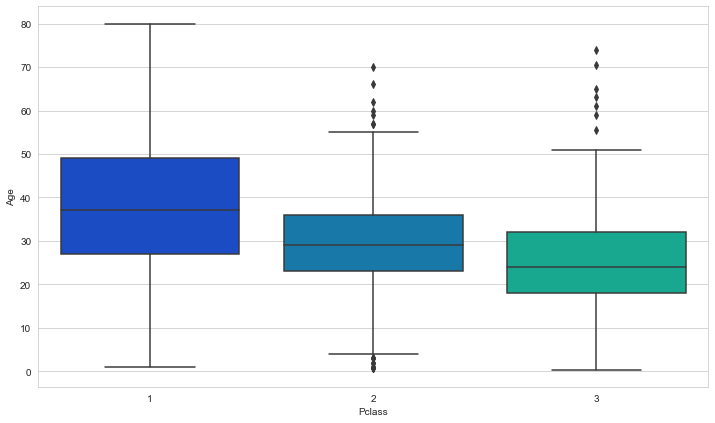

In [90]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

# Analysing the Data

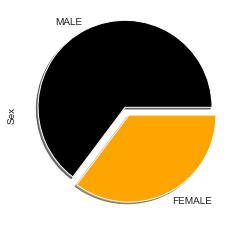

In [91]:
section = [0.1,0]
mycolors = ['black','orange']
mylabels = ['MALE','FEMALE']
df.Sex.value_counts().plot(kind='pie',explode= section, colors=mycolors, labels=mylabels,shadow=True)

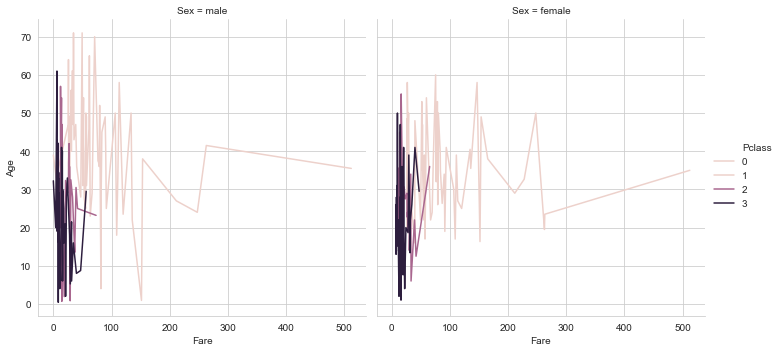

In [92]:
sns.relplot('Fare','Age',data=df, kind='line', hue = 'Pclass', col = 'Sex',ci=None)

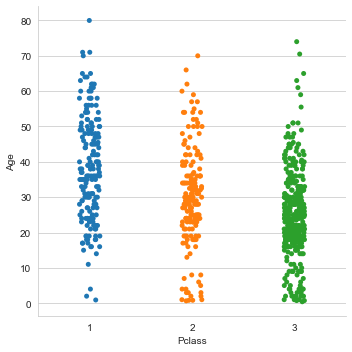

In [93]:
# Here we can observe the clustering of people of different ages in different class

sns.catplot("Pclass","Age",data = df)

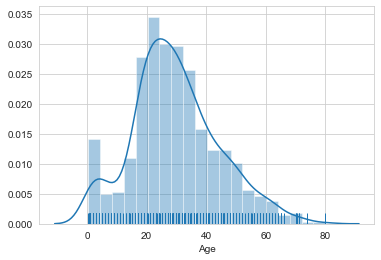

In [94]:
# We can observe that most of the onboard people were between 20-40 years old

sns.distplot(df.Age,rug=True)

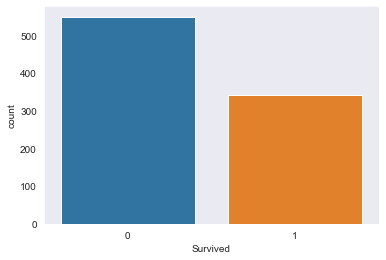

In [95]:
# As we have higher male population than female, lets consider 0 as male and 1 as female:

sns.set_style('dark')
sns.countplot(x='Survived',data=df)

In [96]:
# Dropping the Categorical column

df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [97]:
# Seperating Features and Target column

inputs = df.drop("Survived",axis ='columns')
target = df.Survived

In [98]:
# As the target column have categorical value and we need to change it to numerical value

dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [99]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [100]:
# Features

inputs.drop(['Sex'],axis='columns',inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [101]:
# Checking for any NUll values

inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [102]:
# And yes we can see that there are some NaN  values

inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [103]:

inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.Age[:10]

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [104]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2,random_state=42)

# Lets build the model

In [105]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(X_train,y_train)
pred_gn = model.predict(X_test)
cross_val = cross_val_score(estimator=model, X=X_train, y=y_train, cv=5)
print(classification_report(y_test, pred_gn))
print(confusion_matrix(y_test,pred_gn))
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

[[86 19]
 [21 53]]
0.7822515512656357


In [106]:
X_test[:10]

,Pclass,Age,Fare,female,male
709,3,29.699118,15.2458,0,1
439,2,31.000000,10.5000,0,1
840,3,20.000000,7.9250,0,1
720,2,6.000000,33.0000,1,0
39,3,14.000000,11.2417,1,0
290,1,26.000000,78.8500,1,0
300,3,29.699118,7.7500,1,0
333,3,16.000000,18.0000,0,1
208,3,16.000000,7.7500,1,0
136,1,19.000000,26.2833,1,0


In [107]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [108]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [109]:
model.predict_proba(X_test[:10])

array([[0.9906724 , 0.0093276 ],
       [0.98005615, 0.01994385],
       [0.98884743, 0.01115257],
       [0.01399093, 0.98600907],
       [0.04536928, 0.95463072],
       [0.00186328, 0.99813672],
       [0.06140727, 0.93859273],
       [0.98779422, 0.01220578],
       [0.04757714, 0.95242286],
       [0.00698675, 0.99301325]])

# Support vector Machine

In [110]:
svc = SVC(random_state=42,probability=True)
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
cross_val = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=5)
print(classification_report(y_test, pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.75      0.24      0.37        74

    accuracy                           0.65       179
   macro avg       0.69      0.59      0.56       179
weighted avg       0.68      0.65      0.60       179

[[99  6]
 [56 18]]
0.6642765685019207


# Logistic_Regression

In [111]:
LR = LogisticRegression(C=0.02, solver='liblinear').fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84       105
           1       0.85      0.59      0.70        74

    accuracy                           0.79       179
   macro avg       0.80      0.76      0.77       179
weighted avg       0.80      0.79      0.78       179

[[97  8]
 [30 44]]
Accuracy:  0.7877094972067039


# Random forest Classifier

In [112]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(classification_report(y_test, pred_rf))
cross_val = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=5)
print(confusion_matrix(y_test,pred_rf))
print(cross_val.mean())

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

[[89 16]
 [21 53]]
0.8132374667585935
